# Capstone 2

-- Muchammad Fahd Ishamuddin

## DATA COLLECTION AND IMPORT

### Importing Library
- `Pandas` for reading datafram
- `Numpy` for array and mathematical thing
- `matplitlib` for visualize data
- `seaborn` visualize data more beauty

In [1]:
import pandas as pd #load for dataframe
import numpy as np #load for mathematical thing and numeration
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for advance visualization

#### Open Dataset

Because We use CSV so should use `read_csv` to open file CSV

In [2]:
data = pd.read_csv('NYC_trip_record.csv')
data.head()

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_27112/877952477.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('NYC_trip_record.csv')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


DATA INFORMATION : 

- `VendorID` it means provider id (1 : Creative Mobile, 2 : Verifone Inc.)

- `Ipep_pickup_datetime` date n time when the meter engaged

- `Ipep_dropoff_datetime` date themeter disengaged.

- `Passengger_count` number of passengger

- `Trip_distance` The elapsed trip distance in miles was reported by the taximeter.

- `PULocationID` TLC Taxi Zone in which the taximeter was engaged

- `DOLocationID` TLC T axi Zone in which the taximeter was disengaged.

- `RateCodeID` The final rate code is in effect at the end of the trip. 1 = Standard rate 2 =JFK 3 =Newark 4 =Nassau or Westchester 5 =Negotiated fare 6 =Group ride

- `Store_and_fwd_flag` This flag indicates whether the trip record was held in the vehicle memory before sending to the vendor, aka “store and forward, ” because the vehicle did not have a connection to the server. Y = store and forward trip N = not a store and forward trip

- `Payment_type` A numeric code signifying how the passenger paid for the trip. 1 = Credit card 2 = Cash 3 = No charge 4 = Dispute 5 = Unknown 6 = Voided trip

- `Fare_amount` The time-and-distance fare is calculated by the meter. Extra Miscellaneous extras and surcharges.Currently, this only includes the $0.50 and $1 rush hour and overnight charges.

- `MTA_tax` $0.50 MTA tax that is automatically triggered based on the metered rate in use.

- `Improvement_surcharge` $0.30 improvement surcharge assessed on hailed trips at the flag drop. The improvement surcharge began being levied in 2015.

- `Tip_amount` This field is automatically populated for credit card tips. Cash tips are not included.

- `Tolls_amount` TThe total amount charged to passengers. Does not include cash tips.

- `Trip_type` A code indicating whether the trip was a street hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver. 1 = Street-hail 2 = Dispatch



## Initial Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [5]:
data.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


In [6]:
data.describe(include=object)

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [7]:
data.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

In [8]:
data.RatecodeID.value_counts()

RatecodeID
1.0     62103
5.0      1529
2.0       158
4.0        57
3.0        30
99.0       10
Name: count, dtype: int64

In [9]:
data.payment_type.value_counts()

payment_type
1.0    40686
2.0    22632
3.0      472
4.0       95
5.0        2
Name: count, dtype: int64

In [10]:
data.trip_type.value_counts()

trip_type
1.0    62476
2.0     1401
Name: count, dtype: int64

In [11]:
data.store_and_fwd_flag.value_counts()

store_and_fwd_flag
N    63579
Y      308
Name: count, dtype: int64

In [12]:
data.congestion_surcharge.value_counts()

congestion_surcharge
 0.00    46996
 2.75    16872
 2.50       16
-2.75        3
Name: count, dtype: int64

In [13]:
data.passenger_count.value_counts()

passenger_count
1.0    54299
2.0     5096
5.0     1772
6.0     1054
3.0      958
4.0      364
0.0      336
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64

In [14]:
data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [15]:
numeric_df = data.select_dtypes(include=['float64', 'int64'])
numeric_df

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


## Data Cleaning

### Cleaning

Like what we seen above, the `ehail_fee` column are null so we should drop that column

In [16]:
#because data in ehail_fee all
data = data.drop('ehail_fee',axis=1)

In [17]:
data

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN


In [18]:
data.isnull().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag       4324
RatecodeID               4324
PULocationID                0
DOLocationID                0
passenger_count          4324
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4324
trip_type                4334
congestion_surcharge     4324
dtype: int64

We have to fill na to 6 column there are:
- `store_and_fwd_flag` as Categorical Data
- `RatecodeID` as Categorical Data
- `passengger_count` as Numerical Data
- `payment_type` as Categorical Data
- `trip_type` as Categorical Data
- `congestion_surcharge` as Numerical Data



In [19]:
#fill NA with Mode at store_and_fwd_flag column
mode_flag = data['store_and_fwd_flag'].mode()[0]
data['store_and_fwd_flag'].fillna(mode_flag, inplace=True)

data.store_and_fwd_flag.value_counts()

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_27112/1293544532.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['store_and_fwd_flag'].fillna(mode_flag, inplace=True)


store_and_fwd_flag
N    67903
Y      308
Name: count, dtype: int64

In [20]:
# Replace 99.0 and fill na with mode cause the RatecodeID column is categorical data
mode_rate = data['RatecodeID'].mode()[0]

data['RatecodeID'].fillna(mode_rate, inplace=True) #fillna
data['RatecodeID'].replace(99.0, mode_rate, inplace=True) #replace

data.RatecodeID.value_counts()


/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_27112/2991276155.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['RatecodeID'].fillna(mode_rate, inplace=True) #fillna
/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_27112/2991276155.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

RatecodeID
1.0    66437
5.0     1529
2.0      158
4.0       57
3.0       30
Name: count, dtype: int64

In [21]:
mode_payment = data['payment_type'].mode()[0]
data['payment_type'].fillna(mode_payment, inplace=True)

data.payment_type.value_counts()

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_27112/232235378.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['payment_type'].fillna(mode_payment, inplace=True)


payment_type
1.0    45010
2.0    22632
3.0      472
4.0       95
5.0        2
Name: count, dtype: int64

In [22]:
mode_trip = data['trip_type'].mode()[0]
data['trip_type'].fillna(mode_trip, inplace=True) #fillNA

data.trip_type.value_counts()

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_27112/2562065600.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['trip_type'].fillna(mode_trip, inplace=True) #fillNA


trip_type
1.0    66810
2.0     1401
Name: count, dtype: int64

`Passengger Count` and `Congestion Surcharge`

In [23]:
data.congestion_surcharge.value_counts()

congestion_surcharge
 0.00    46996
 2.75    16872
 2.50       16
-2.75        3
Name: count, dtype: int64

In [24]:
data.passenger_count.value_counts()

passenger_count
1.0    54299
2.0     5096
5.0     1772
6.0     1054
3.0      958
4.0      364
0.0      336
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64

This 2 column have a lot anomaly, at `congestion_surcharge` have -2.75 where this is impossible and 2.50 a minority, at `passengger_count` they anomaly is the taxi can load the passengger more than 4 person that illegal

In [25]:
from scipy.stats import normaltest

surcharge_temp = data['congestion_surcharge'].dropna()
passengger_temp = data['passenger_count'].dropna()

statistic_sur, p_value_sur = normaltest(surcharge_temp)
print(f"surcharge_temp - Statistic: {statistic_sur}, p-value: {p_value_sur}")

statistic_pas, p_value_pas = normaltest(passengger_temp)
print(f"passengger_temp - Statistic: {statistic_pas}, p-value: {p_value_pas}")

surcharge_temp - Statistic: 15407.10818901519, p-value: 0.0
passengger_temp - Statistic: 45431.44711663079, p-value: 0.0


This 2 column distribution are not normal, so we could fill the NaN and replace the anomaly with Median

![Screenshot 2024-11-05 at 00.01.08.png](<attachment:Screenshot 2024-11-05 at 00.01.08.png>)
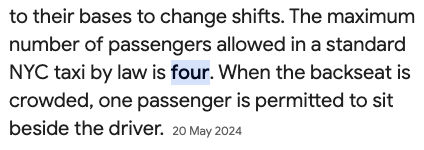

In [26]:
median_pass = data['passenger_count'].median()
median_pass
data['passenger_count'].fillna(median_pass,inplace=True)

#cause if the seat>4 not allowed, we should drop the data where > 4 passengger and > 0
data = data[(data['passenger_count']>0.0)&(data['passenger_count']<5.0)]
data.passenger_count.value_counts()

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_27112/1011431380.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['passenger_count'].fillna(median_pass,inplace=True)


passenger_count
1.0    58623
2.0     5096
3.0      958
4.0      364
Name: count, dtype: int64

In [27]:
mode_congestion = data['congestion_surcharge'].mode()[0]
data['congestion_surcharge'].fillna(mode_congestion, inplace=True)
data['congestion_surcharge'].replace(-2.75,mode_congestion,inplace=True)
data['congestion_surcharge'].replace(2.50,mode_congestion,inplace=True)
data.congestion_surcharge.value_counts()

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_27112/2313100893.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['congestion_surcharge'].fillna(mode_congestion, inplace=True)
/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_27112/2313100893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['congestion_surch

congestion_surcharge
0.00    49114
2.75    15927
Name: count, dtype: int64

In [28]:
# numeric_df = data.select_dtypes(include=['float64', 'int64'])

# # Create correlation heatmap
# plt.figure(figsize=(15,8))
# sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
# plt.show()

In [29]:
# plt.figure(figsize=(8, 6))
# sns.histplot(data=data, x='passenger_count',bins=50)
# plt.title("Boxplot of Passenger Count with Outliers")
# plt.show()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65041 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               65041 non-null  int64  
 1   lpep_pickup_datetime   65041 non-null  object 
 2   lpep_dropoff_datetime  65041 non-null  object 
 3   store_and_fwd_flag     65041 non-null  object 
 4   RatecodeID             65041 non-null  float64
 5   PULocationID           65041 non-null  int64  
 6   DOLocationID           65041 non-null  int64  
 7   passenger_count        65041 non-null  float64
 8   trip_distance          65041 non-null  float64
 9   fare_amount            65041 non-null  float64
 10  extra                  65041 non-null  float64
 11  mta_tax                65041 non-null  float64
 12  tip_amount             65041 non-null  float64
 13  tolls_amount           65041 non-null  float64
 14  improvement_surcharge  65041 non-null  float64
 15  total_a

change data type `lpep_pickup_datetime` and `lpep_dropoff_datetime` to date time

In [31]:
data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])
data['lpep_dropoff_datetime'] = pd.to_datetime(data['lpep_dropoff_datetime'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65041 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               65041 non-null  int64         
 1   lpep_pickup_datetime   65041 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  65041 non-null  datetime64[ns]
 3   store_and_fwd_flag     65041 non-null  object        
 4   RatecodeID             65041 non-null  float64       
 5   PULocationID           65041 non-null  int64         
 6   DOLocationID           65041 non-null  int64         
 7   passenger_count        65041 non-null  float64       
 8   trip_distance          65041 non-null  float64       
 9   fare_amount            65041 non-null  float64       
 10  extra                  65041 non-null  float64       
 11  mta_tax                65041 non-null  float64       
 12  tip_amount             65041 non-null  float64       
 13  tolls_

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_27112/3459622852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])
/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_27112/3459622852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lpep_dropoff_datetime'] = pd.to_datetime(data['lpep_dropoff_datetime'])


In [32]:
data['trip_distance']=pd.to_numeric(data['trip_distance'], errors='coerce')

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_27112/1394673726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['trip_distance']=pd.to_numeric(data['trip_distance'], errors='coerce')


In [33]:
data.extra.value_counts()

extra
 0.00     38922
 2.50     11505
 1.00     10547
 2.75      1527
 5.00       783
 0.50       600
 5.25       470
 7.50       265
 3.75       219
 6.00        75
 3.25        50
-2.50        43
-1.00        31
-0.50         2
 5.50         1
 12.50        1
Name: count, dtype: int64

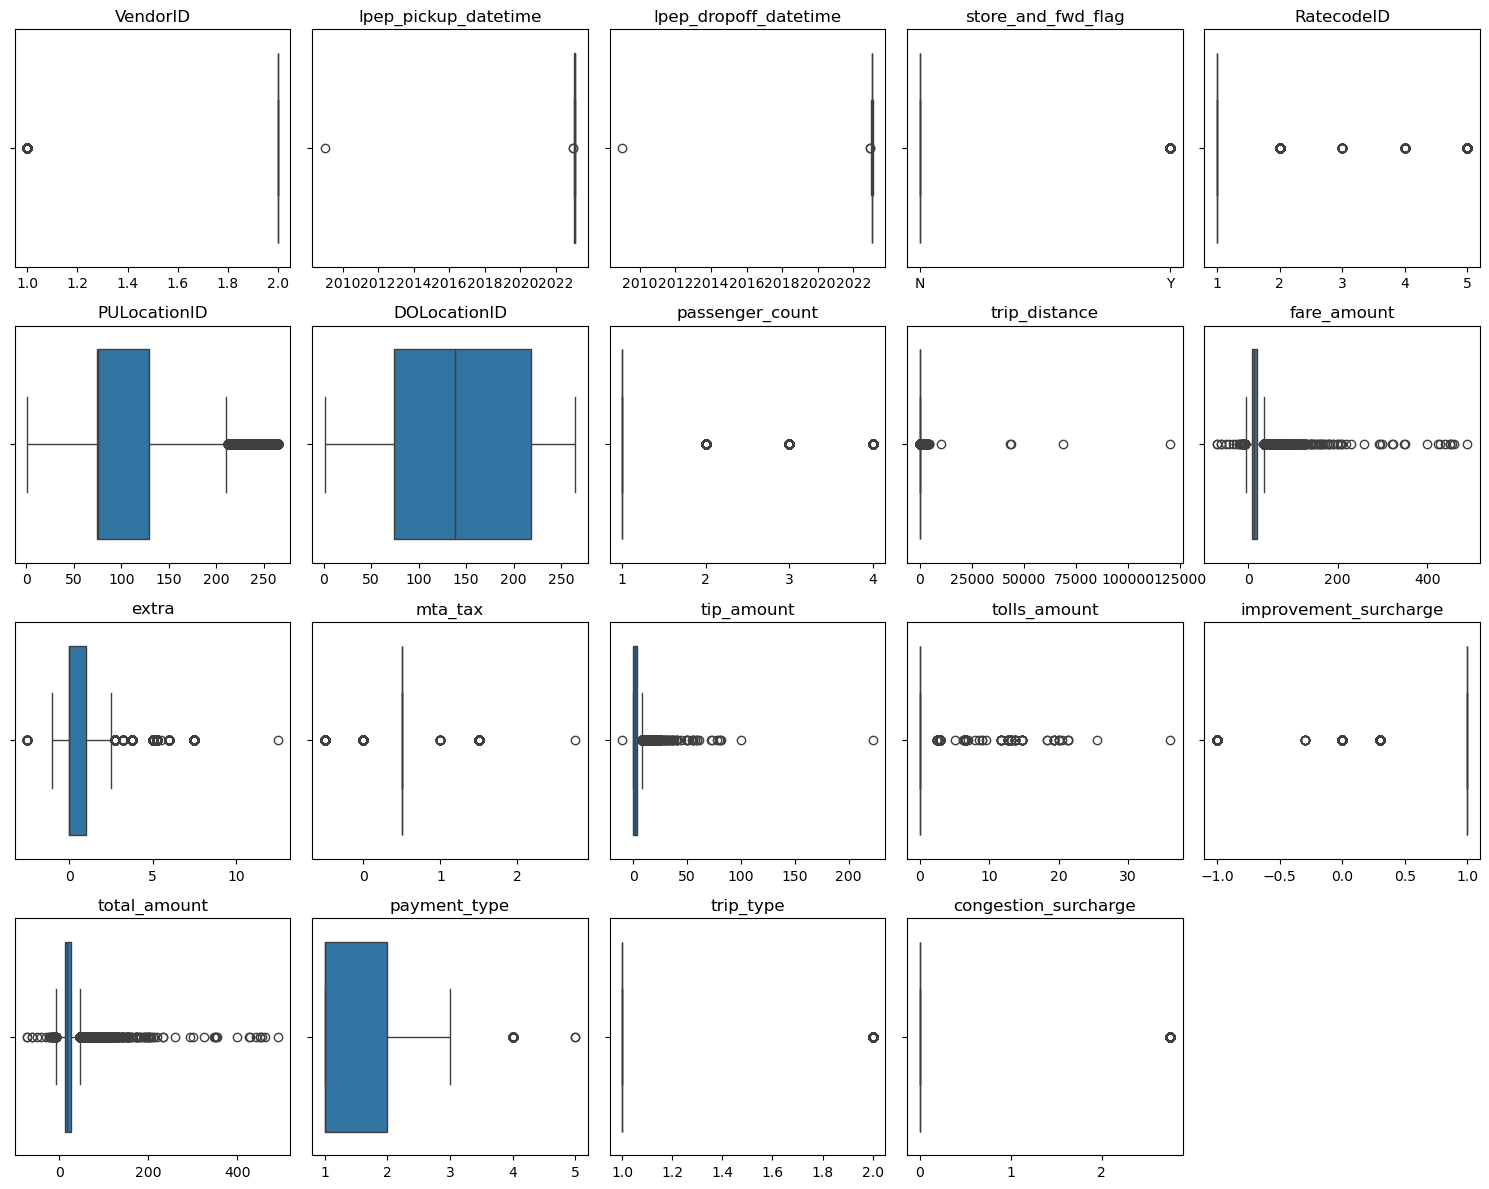

In [34]:
rows, cols = 4,5
fig, axes = plt.subplots(rows, cols, figsize=(15,12))
axes = axes.flatten()
for i, column in enumerate(data.columns):
    sns.boxplot(data=data, x=column, ax=axes[i])  # Use each subplot's axis
    axes[i].set_title(column)
    axes[i].set_xlabel('')  # Optional: Hide x-axis labels for a cleaner look

# Remove any empty subplots (if columns < grid slots)
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65041 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               65041 non-null  int64         
 1   lpep_pickup_datetime   65041 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  65041 non-null  datetime64[ns]
 3   store_and_fwd_flag     65041 non-null  object        
 4   RatecodeID             65041 non-null  float64       
 5   PULocationID           65041 non-null  int64         
 6   DOLocationID           65041 non-null  int64         
 7   passenger_count        65041 non-null  float64       
 8   trip_distance          65041 non-null  float64       
 9   fare_amount            65041 non-null  float64       
 10  extra                  65041 non-null  float64       
 11  mta_tax                65041 non-null  float64       
 12  tip_amount             65041 non-null  float64       
 13  tolls_

From this Boxplot we found several anomali:
- `lpep_pickup_datetime` and ` lpep_dropoff_datetime` have data since 2009 (action : Drop)
- `trip distance` > 1000 where doesnt makesense (action : manipulate)
- `mta_tax` have -0.50 (action : replace based on normaltest)
- `improvement_surcharge` have -1.0 and -3.0 (action: normal test and then replace)
- `extra` have negative value (action: normal test and then replace)
- `fare_amount` have negative value (action: normal test and then replace)
- `tip_amount` drop outlier > 100
- `tollS_amount` drop outlier > 30


In [36]:
data['lpep_dropoff_datetime'].dt.year.value_counts()

lpep_dropoff_datetime
2023    65038
2022        2
2009        1
Name: count, dtype: int64

In [37]:
data = data[data['lpep_pickup_datetime'].dt.year==2023]

data not at 2023 are dropped (didnt selected)

In [38]:
len(data)

65038

In [39]:
data['trip_distance']=pd.to_numeric(data['trip_distance'], errors='coerce')
data.loc[data['trip_distance'] >= 200, 'trip_distance'] = data['trip_distance'].apply(
    lambda x: f"{x / 100:.2f}" if x >= 200 else x
)

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_27112/3169798954.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['15.72' '5.80' '25.55' '30.78' '26.07' '433.92' '24.47' '20.27' '10.82'
 '1200.99' '26.46' '39.66' '15.93' '23.78' '35.16' '104.80' '18.03'
 '26.35' '43.89' '23.67' '2.55' '440.03' '45.03' '35.09' '20.11' '39.41'
 '39.82' '36.14' '15.43' '24.64' '33.21' '47.07' '687.97' '23.89' '30.09'
 '40.71']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data['trip_distance'] >= 200, 'trip_distance'] = data['trip_distance'].apply(


In [40]:
data.trip_distance.value_counts()

trip_distance
0.0      3269
1.4       610
1.3       554
1.2       501
1.5       474
         ... 
14.81       1
13.06       1
38.6        1
18.06       1
40.71       1
Name: count, Length: 1857, dtype: int64

`trip_distance` didnt should be 0 so i want to drop it

`trip_distance` == 0 is doesnt make sense

In [41]:
data['trip_distance']=pd.to_numeric(data['trip_distance'], errors='coerce')
data = data[data['trip_distance']>0.5]

In [42]:
data.trip_distance.describe()

count    59544.000000
mean         2.968338
std          6.861355
min          0.510000
25%          1.300000
50%          2.000000
75%          3.420000
max       1200.990000
Name: trip_distance, dtype: float64

- `mta_tax` have -0.50 (action : replace based on normaltest)
- `improvement_surcharge` have -1.0 and -3.0 (action: normal test and then replace)
- `extra` have negative value (action: normal test and then replace)

In [43]:
statistic_tax, p_value_tax = normaltest(data['mta_tax'])
print(f"statistic_tax - Statistic: {statistic_tax}, p-value: {p_value_tax}")

statistic_imp, p_value_imp = normaltest(data['improvement_surcharge'])
print(f"statistic_imp - Statistic: {statistic_imp}, p-value: {p_value_imp}")

statistic_ext, p_value_ext = normaltest(data['extra'])
print(f"statistic_ext - Statistic: {statistic_ext}, p-value: {p_value_ext}")

statistic_tax - Statistic: 16582.403138671772, p-value: 0.0
statistic_imp - Statistic: 48514.33744079364, p-value: 0.0
statistic_ext - Statistic: 20268.064079455875, p-value: 0.0


this 3 data are not normal distribution so we input the replace with median

In [44]:
data.mta_tax.value_counts()

mta_tax
 0.5    47717
 1.5     7039
 0.0     4744
-0.5       32
 1.0       12
Name: count, dtype: int64

In [45]:
median_tax = data['mta_tax'].median()
data['mta_tax'].replace(-0.50, median_tax,inplace=True)
data.mta_tax.value_counts()

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_27112/2107378724.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['mta_tax'].replace(-0.50, median_tax,inplace=True)


mta_tax
0.5    47749
1.5     7039
0.0     4744
1.0       12
Name: count, dtype: int64

2.75 is only one, this thing should be better if we deleted

In [46]:
data.improvement_surcharge.value_counts()

improvement_surcharge
 1.0    55834
 0.3     3609
 0.0       69
-1.0       30
-0.3        2
Name: count, dtype: int64

In [47]:
median_imp = data['improvement_surcharge'].median()
data['improvement_surcharge'].replace(-0.3, median_imp,inplace=True)
data['improvement_surcharge'].replace(-1.0, median_imp,inplace=True)
data.improvement_surcharge.value_counts()

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_27112/462021207.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['improvement_surcharge'].replace(-0.3, median_imp,inplace=True)
/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_27112/462021207.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

improvement_surcharge
1.0    55866
0.3     3609
0.0       69
Name: count, dtype: int64

In [48]:
data.extra.value_counts()

extra
 0.00     34818
 2.50     10909
 1.00      9903
 2.75      1514
 5.00       761
 0.50       549
 5.25       467
 7.50       261
 3.75       218
 6.00        74
 3.25        50
-2.50        12
-1.00         6
 5.50         1
 12.50        1
Name: count, dtype: int64

In [49]:
median_ext = data['extra'].median()
data['extra'].replace(-0.50, median_ext,inplace=True)
data['extra'].replace(-1.00, median_imp,inplace=True)
data['extra'].replace(-2.50, median_imp,inplace=True)
data.extra.value_counts()

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_27112/2284955229.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['extra'].replace(-0.50, median_ext,inplace=True)
/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_27112/2284955229.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

extra
0.00     34818
2.50     10909
1.00      9921
2.75      1514
5.00       761
0.50       549
5.25       467
7.50       261
3.75       218
6.00        74
3.25        50
5.50         1
12.50        1
Name: count, dtype: int64

Data extra have a lot outlier, so we should remove the data who have outlier, so we should declare the treshold, where i want to declare the treshold is 7.50

In [50]:
# Define a maximum threshold based on analysis
max_threshold = 7.50  # Adjust as needed based on domain knowledge

# Filter to keep only rows with 0 <= extra <= max_threshold
data = data[(data['extra'] >= 0) & (data['extra'] <= max_threshold)]

# Display the resulting DataFrame
print(data['extra'].value_counts())

extra
0.00    34818
2.50    10909
1.00     9921
2.75     1514
5.00      761
0.50      549
5.25      467
7.50      261
3.75      218
6.00       74
3.25       50
5.50        1
Name: count, dtype: int64


cause we see again if in fare amount there any negative value we should drop the negative fare amount

In [51]:
print("how many fare amount below zero is:",len(data[data['fare_amount']<0]))

how many fare amount below zero is: 33


In [52]:
data = data[data['fare_amount']>0]

In [53]:
data['extra'].describe()

count    59497.000000
mean         0.861510
std          1.285897
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          7.500000
Name: extra, dtype: float64

In [54]:
data.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

Data cleaned and not null there

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59497 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               59497 non-null  int64         
 1   lpep_pickup_datetime   59497 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  59497 non-null  datetime64[ns]
 3   store_and_fwd_flag     59497 non-null  object        
 4   RatecodeID             59497 non-null  float64       
 5   PULocationID           59497 non-null  int64         
 6   DOLocationID           59497 non-null  int64         
 7   passenger_count        59497 non-null  float64       
 8   trip_distance          59497 non-null  float64       
 9   fare_amount            59497 non-null  float64       
 10  extra                  59497 non-null  float64       
 11  mta_tax                59497 non-null  float64       
 12  tip_amount             59497 non-null  float64       
 13  tolls_

In [56]:
data.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,59497.000000,59497,59497,59497.000000,59497.000000,59497.000000,59497.000000,59497.000000,59497.000000,59497.000000,59497.000000,59497.000000,59497.000000,59497.000000,59497.000000,59497.000000,59497.000000,59497.000000
mean,1.879154,2023-01-16 22:58:34.497890560,2023-01-16 23:17:09.339059200,1.051582,97.115384,139.418038,1.125653,2.967532,16.781054,0.861510,0.578643,2.240323,0.160923,0.956531,22.146664,1.338488,1.010152,0.725990
min,1.000000,2023-01-01 00:01:31,2023-01-01 00:16:02,1.000000,3.000000,1.000000,1.000000,0.510000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,1.010000,1.000000,1.000000,0.000000
25%,2.000000,2023-01-09 12:48:16,2023-01-09 13:03:52,1.000000,74.000000,74.000000,1.000000,1.300000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,13.400000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 09:41:23,2023-01-17 10:00:40,1.000000,75.000000,140.000000,1.000000,2.000000,13.500000,0.000000,0.500000,1.940000,0.000000,1.000000,18.210000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 16:14:31,2023-01-24 16:31:56,1.000000,116.000000,223.000000,1.000000,3.420000,19.800000,1.000000,0.500000,3.480000,0.000000,1.000000,26.350000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,265.000000,265.000000,4.000000,1200.990000,425.000000,7.500000,1.500000,222.220000,36.050000,1.000000,426.000000,4.000000,2.000000,2.750000
std,0.325951,NaN,NaN,0.441302,59.360622,76.464496,0.418105,6.860723,12.036880,1.285897,0.363400,3.000387,1.063197,0.169829,14.206355,0.480705,0.100244,1.212203


Before Move to Data Transformation dont forget to reset `total_amount` cause we manipulate several data, where have impact to `total_amount`

In [57]:
data['total_amount'] = data[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'improvement_surcharge']].sum(axis=1)
data

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,21.43,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,11.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,9.00,1.0,1.0,0.00
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,1.0,0.5,0.00,0.0,1.0,20.20,2.0,1.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,1.0,40.71,15.70,0.0,0.0,0.00,0.0,1.0,16.70,1.0,1.0,0.00
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,1.0,1.0,0.00
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,1.0,1.0,0.00
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,1.0,1.0,0.00


DROP OUTLIER

In [58]:
data = data[data['tip_amount']< 100]
data.tip_amount.describe()

count    59496.000000
mean         2.236626
std          2.861660
min          0.000000
25%          0.000000
50%          1.940000
75%          3.480000
max         80.880000
Name: tip_amount, dtype: float64

In [59]:
data = data[data['tolls_amount']< 30]
data.tolls_amount.describe()

count    59495.000000
mean         0.160323
std          1.052984
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         21.300000
Name: tolls_amount, dtype: float64

In [60]:
# Apply transformation to `trip_distance` and convert result to float
data['trip_distance'] = data['trip_distance'].astype(float)
data.loc[data['trip_distance'] >= 200.0, 'trip_distance'] = data['trip_distance'].apply(
    lambda x: round(x / 100, 2) if x >= 200.0 else x
)

# Now filter `trip_distance` with the updated float values
data = data[data['trip_distance'] > 0.5]

# Display summary statistics
print(data['trip_distance'].describe())

count    59495.000000
mean         2.921186
std          2.952430
min          0.510000
25%          1.300000
50%          2.000000
75%          3.420000
max        137.950000
Name: trip_distance, dtype: float64


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59495 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               59495 non-null  int64         
 1   lpep_pickup_datetime   59495 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  59495 non-null  datetime64[ns]
 3   store_and_fwd_flag     59495 non-null  object        
 4   RatecodeID             59495 non-null  float64       
 5   PULocationID           59495 non-null  int64         
 6   DOLocationID           59495 non-null  int64         
 7   passenger_count        59495 non-null  float64       
 8   trip_distance          59495 non-null  float64       
 9   fare_amount            59495 non-null  float64       
 10  extra                  59495 non-null  float64       
 11  mta_tax                59495 non-null  float64       
 12  tip_amount             59495 non-null  float64       
 13  tolls_

## Data Transformation

Cause my  purpose is try to make business analytic of NYC taxi, so i want separate data to be day, month, year and hour of each data

In [62]:

data['month_pickup'] = data['lpep_pickup_datetime'].dt.month
data['day_pickup'] = data['lpep_pickup_datetime'].dt.day
data['hour_pickup'] = data['lpep_pickup_datetime'].dt.hour
data['pickup_day'] = data['lpep_pickup_datetime'].dt.dayofweek
data['pickup_day_name'] = data['lpep_pickup_datetime'].dt.day_name()

In [63]:
data

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,month_pickup,day_pickup,hour_pickup,pickup_day,pickup_day_name
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,1.0,21.43,1.0,1.0,2.75,1,1,0,6,Sunday
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,1.0,15.84,1.0,1.0,0.00,1,1,0,6,Sunday
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,1.0,11.20,1.0,1.0,0.00,1,1,0,6,Sunday
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,1.0,9.00,1.0,1.0,0.00,1,1,0,6,Sunday
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,...,1.0,20.20,2.0,1.0,2.75,1,1,0,6,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,1.0,40.71,15.70,...,1.0,16.70,1.0,1.0,0.00,1,31,22,1,Tuesday
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.14,4.41,...,1.0,5.41,1.0,1.0,0.00,1,31,22,1,Tuesday
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,...,1.0,21.04,1.0,1.0,0.00,1,31,23,1,Tuesday
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,...,1.0,19.18,1.0,1.0,0.00,1,31,23,1,Tuesday


In [64]:

data['month_dropoff'] = data['lpep_dropoff_datetime'].dt.month
data['day_dropoff'] = data['lpep_dropoff_datetime'].dt.day
data['hour_dropoff'] = data['lpep_dropoff_datetime'].dt.hour
data['dropoff_day'] = data['lpep_dropoff_datetime'].dt.dayofweek

In [65]:
data

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,congestion_surcharge,month_pickup,day_pickup,hour_pickup,pickup_day,pickup_day_name,month_dropoff,day_dropoff,hour_dropoff,dropoff_day
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,2.75,1,1,0,6,Sunday,1,1,0,6
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,0.00,1,1,0,6,Sunday,1,1,0,6
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,0.00,1,1,0,6,Sunday,1,1,0,6
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,0.00,1,1,0,6,Sunday,1,1,0,6
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,...,2.75,1,1,0,6,Sunday,1,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,1.0,40.71,15.70,...,0.00,1,31,22,1,Tuesday,1,31,22,1
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.14,4.41,...,0.00,1,31,22,1,Tuesday,1,31,22,1
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,...,0.00,1,31,23,1,Tuesday,2,1,0,2
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,...,0.00,1,31,23,1,Tuesday,1,31,23,1


In [66]:
data.month_dropoff.value_counts()

month_dropoff
1    59480
2       15
Name: count, dtype: int64

drop value 2 in `month_dropoff`

In [67]:
data = data[data['month_dropoff']<2]
data.month_dropoff.value_counts()

month_dropoff
1    59480
Name: count, dtype: int64

In [68]:
# data['trip_duration_hours'] = (data['lpep_dropoff_datetime'] - data['lpep_pickup_datetime']).dt.total_seconds() / 3600

In [69]:
data['trip_duration_minutes'] = (data['lpep_dropoff_datetime'] - data['lpep_pickup_datetime']).dt.total_seconds() / 60

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_27112/21176370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['trip_duration_minutes'] = (data['lpep_dropoff_datetime'] - data['lpep_pickup_datetime']).dt.total_seconds() / 60


`trip_duration_minutes` have a purpose to know duration betwwen the trip

In [70]:
data.trip_duration_minutes.describe()

count    59480.000000
mean        18.434460
std         74.802551
min          0.000000
25%          7.816667
50%         11.783333
75%         17.650000
max       1438.933333
Name: trip_duration_minutes, dtype: float64

we found trip minute min is 0 that doesnt make sense cause the trip didnt start so we choose trip minute > 1

In [71]:
data = data[data['trip_duration_minutes']>1]

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59399 entries, 0 to 68209
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               59399 non-null  int64         
 1   lpep_pickup_datetime   59399 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  59399 non-null  datetime64[ns]
 3   store_and_fwd_flag     59399 non-null  object        
 4   RatecodeID             59399 non-null  float64       
 5   PULocationID           59399 non-null  int64         
 6   DOLocationID           59399 non-null  int64         
 7   passenger_count        59399 non-null  float64       
 8   trip_distance          59399 non-null  float64       
 9   fare_amount            59399 non-null  float64       
 10  extra                  59399 non-null  float64       
 11  mta_tax                59399 non-null  float64       
 12  tip_amount             59399 non-null  float64       
 13  tolls_

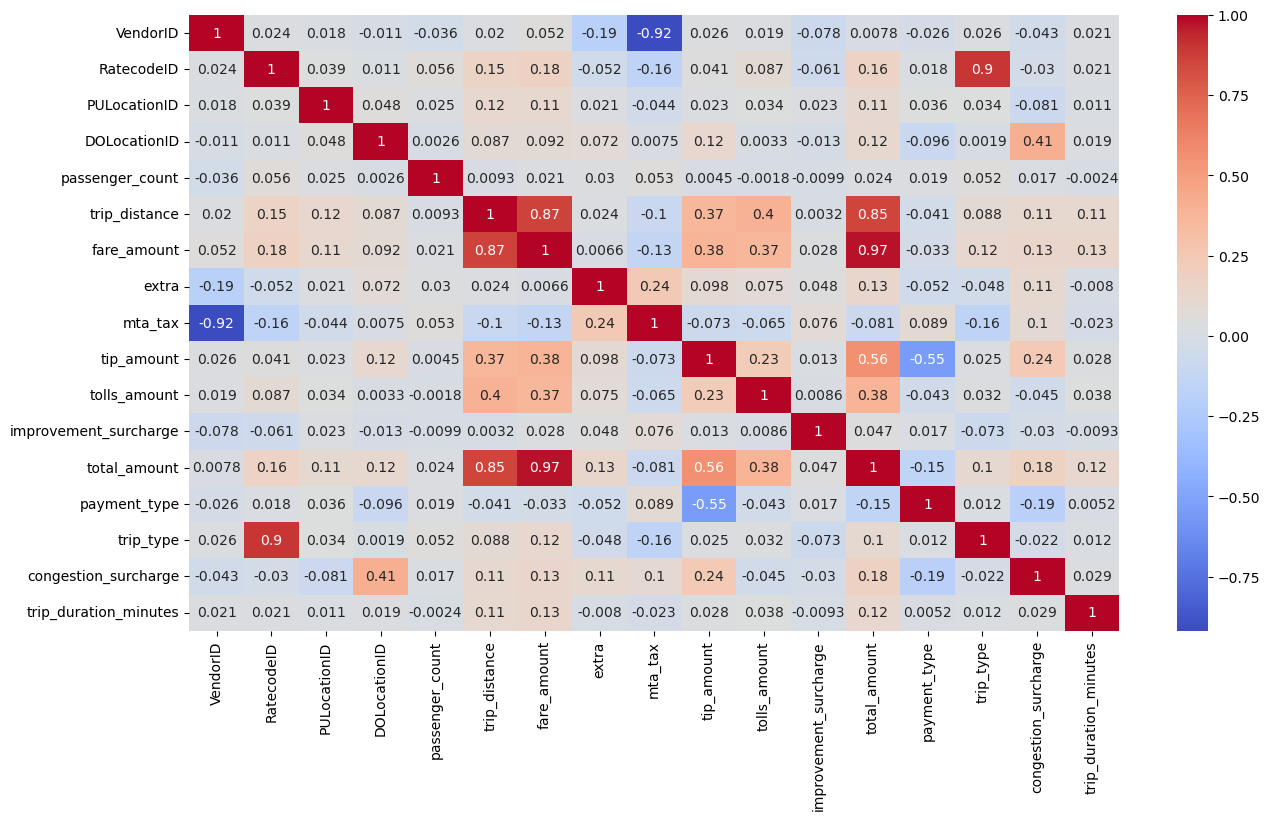

In [73]:
numeric_df = data.select_dtypes(include=['float64', 'int64'])

# Create correlation heatmap
plt.figure(figsize=(15,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

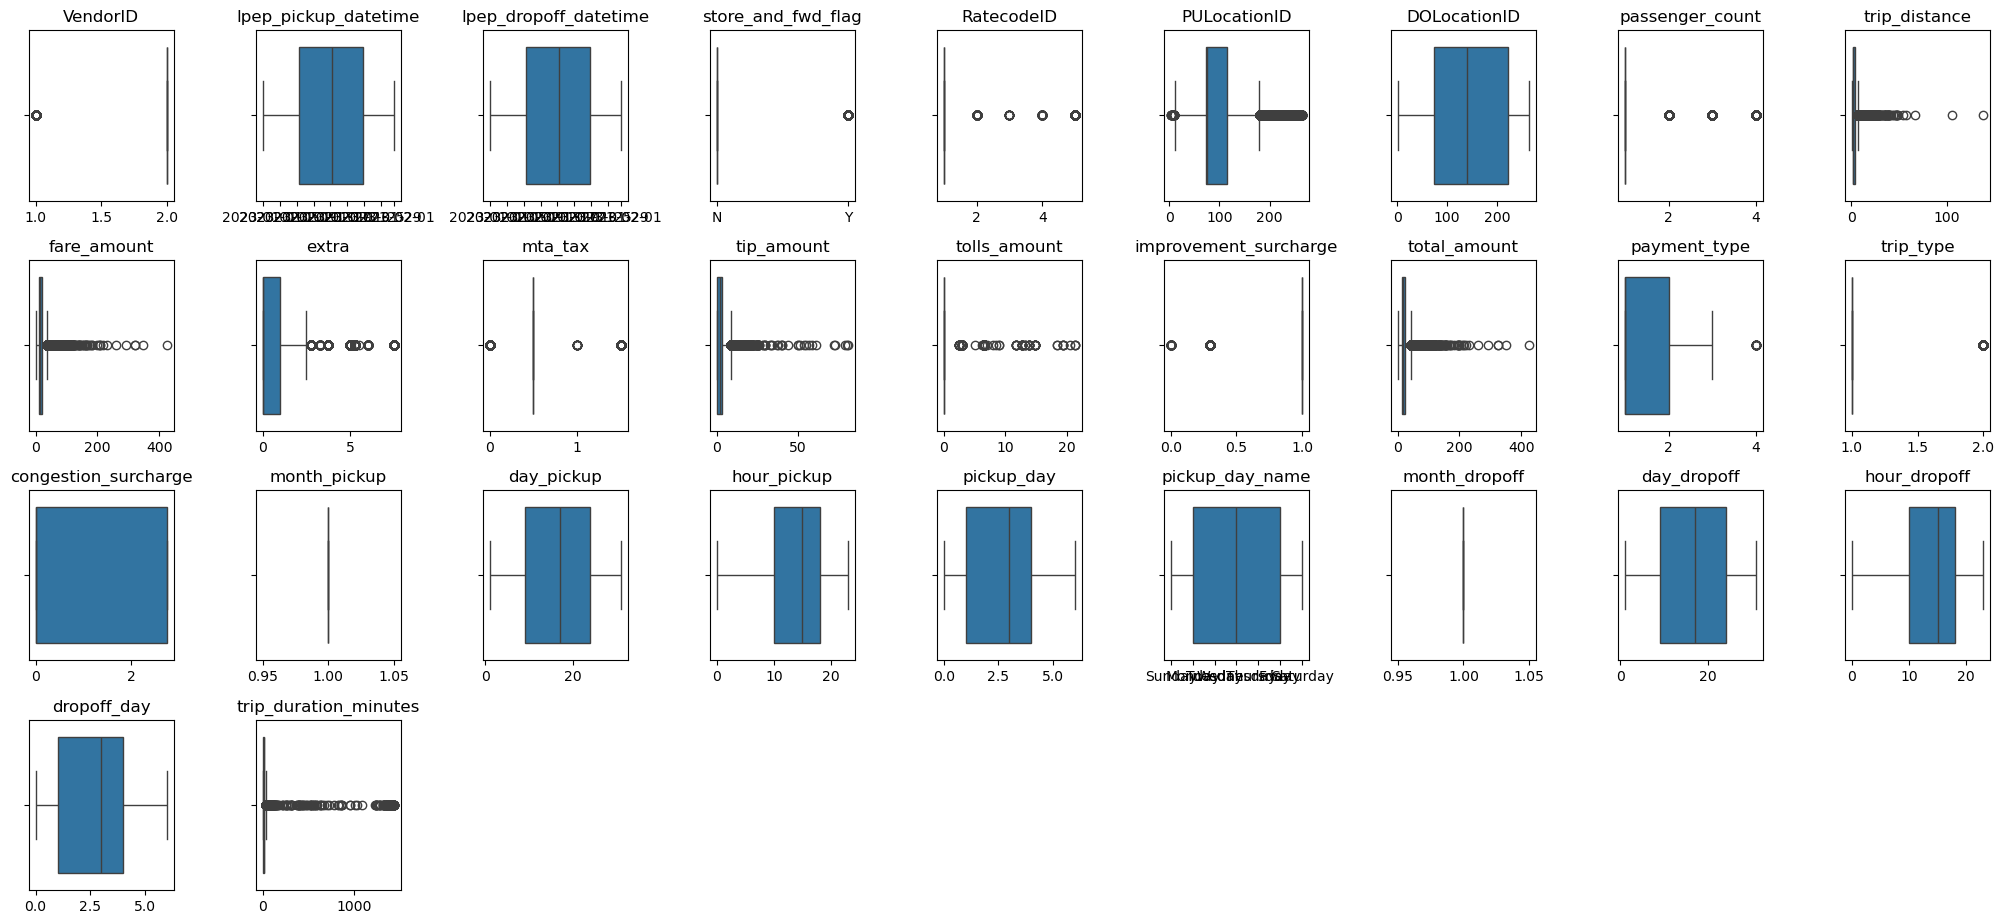

In [74]:
rows, cols = 7, 9
fig, axes = plt.subplots(rows, cols, figsize=(20, 16))
axes = axes.flatten()
for i, column in enumerate(data.columns):
    sns.boxplot(data=data, x=column, ax=axes[i])  # Use each subplot's axis
    axes[i].set_title(column)
    axes[i].set_xlabel('')  # Optional: Hide x-axis labels for a cleaner look

# Remove any empty subplots (if columns < grid slots)
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [75]:

statistic_duration, p_value_duration = normaltest(data['trip_duration_minutes'])
print(f"surcharge_temp - Statistic: {statistic_duration}, p-value: {p_value_duration}")

statistic_distance, p_value_distance = normaltest(data['trip_distance'])
print(f"passengger_temp - Statistic: {statistic_distance}, p-value: {p_value_distance}")

statistic_totam, p_value_totam = normaltest(data['total_amount'])
print(f"passengger_temp - Statistic: {statistic_totam}, p-value: {p_value_totam}")

surcharge_temp - Statistic: 120997.6926586408, p-value: 0.0
passengger_temp - Statistic: 72341.39157448159, p-value: 0.0
passengger_temp - Statistic: 55392.266292028595, p-value: 0.0


After seen this Boxplot column `trip_duration_minutes`, `trip_distance` and `total_amount` not have normal distribution and still have outlier, so we drop the data above treshold, where at `trip_duration_minutes` setting `<` 120, at `trip_distances` we set `<` 70 and at `total_amount` we set `<` 400

In [76]:
data=data[data['trip_duration_minutes']<120]

In [77]:
data = data[data['trip_distance']<50]

In [78]:
data = data[data['total_amount']<400]

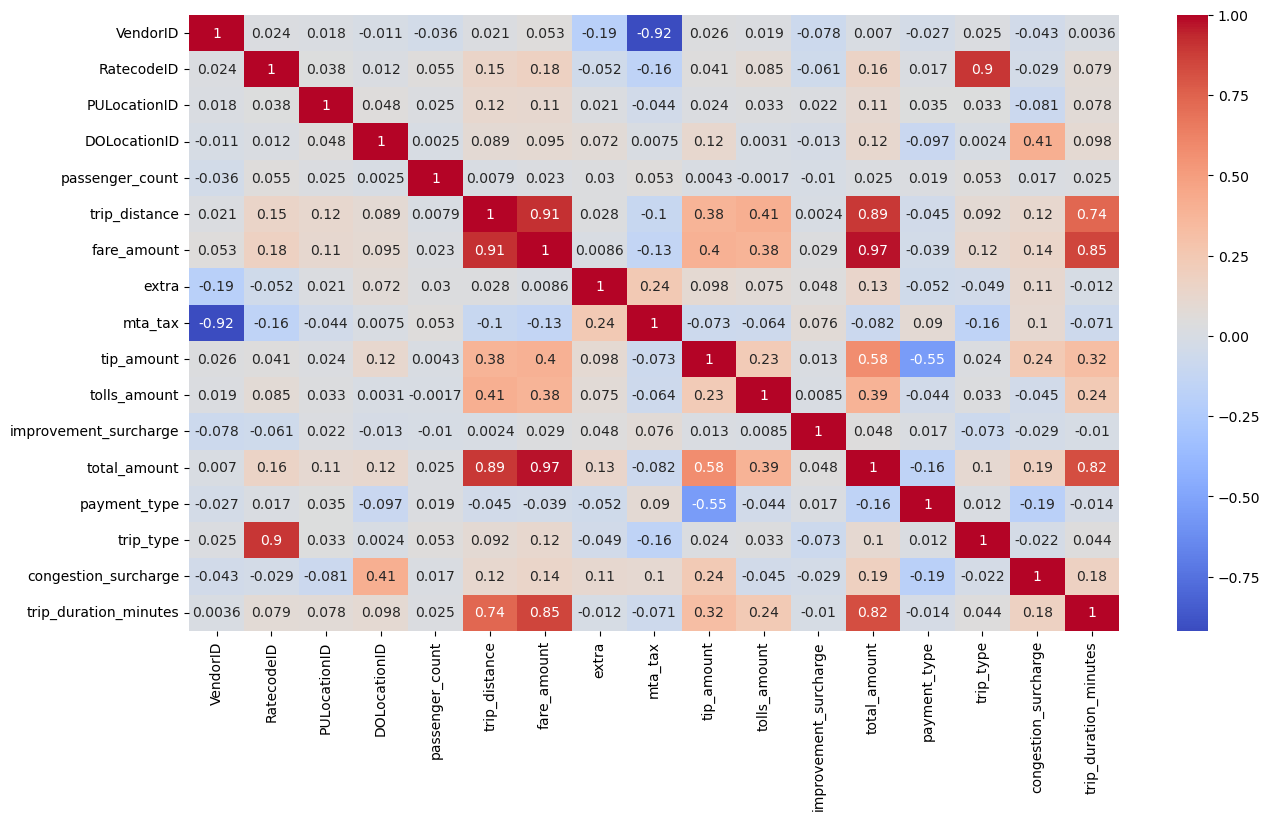

In [79]:
numeric_df = data.select_dtypes(include=['float64', 'int64'])

# Create correlation heatmap
plt.figure(figsize=(15,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

After deep cleaning correlation more connected

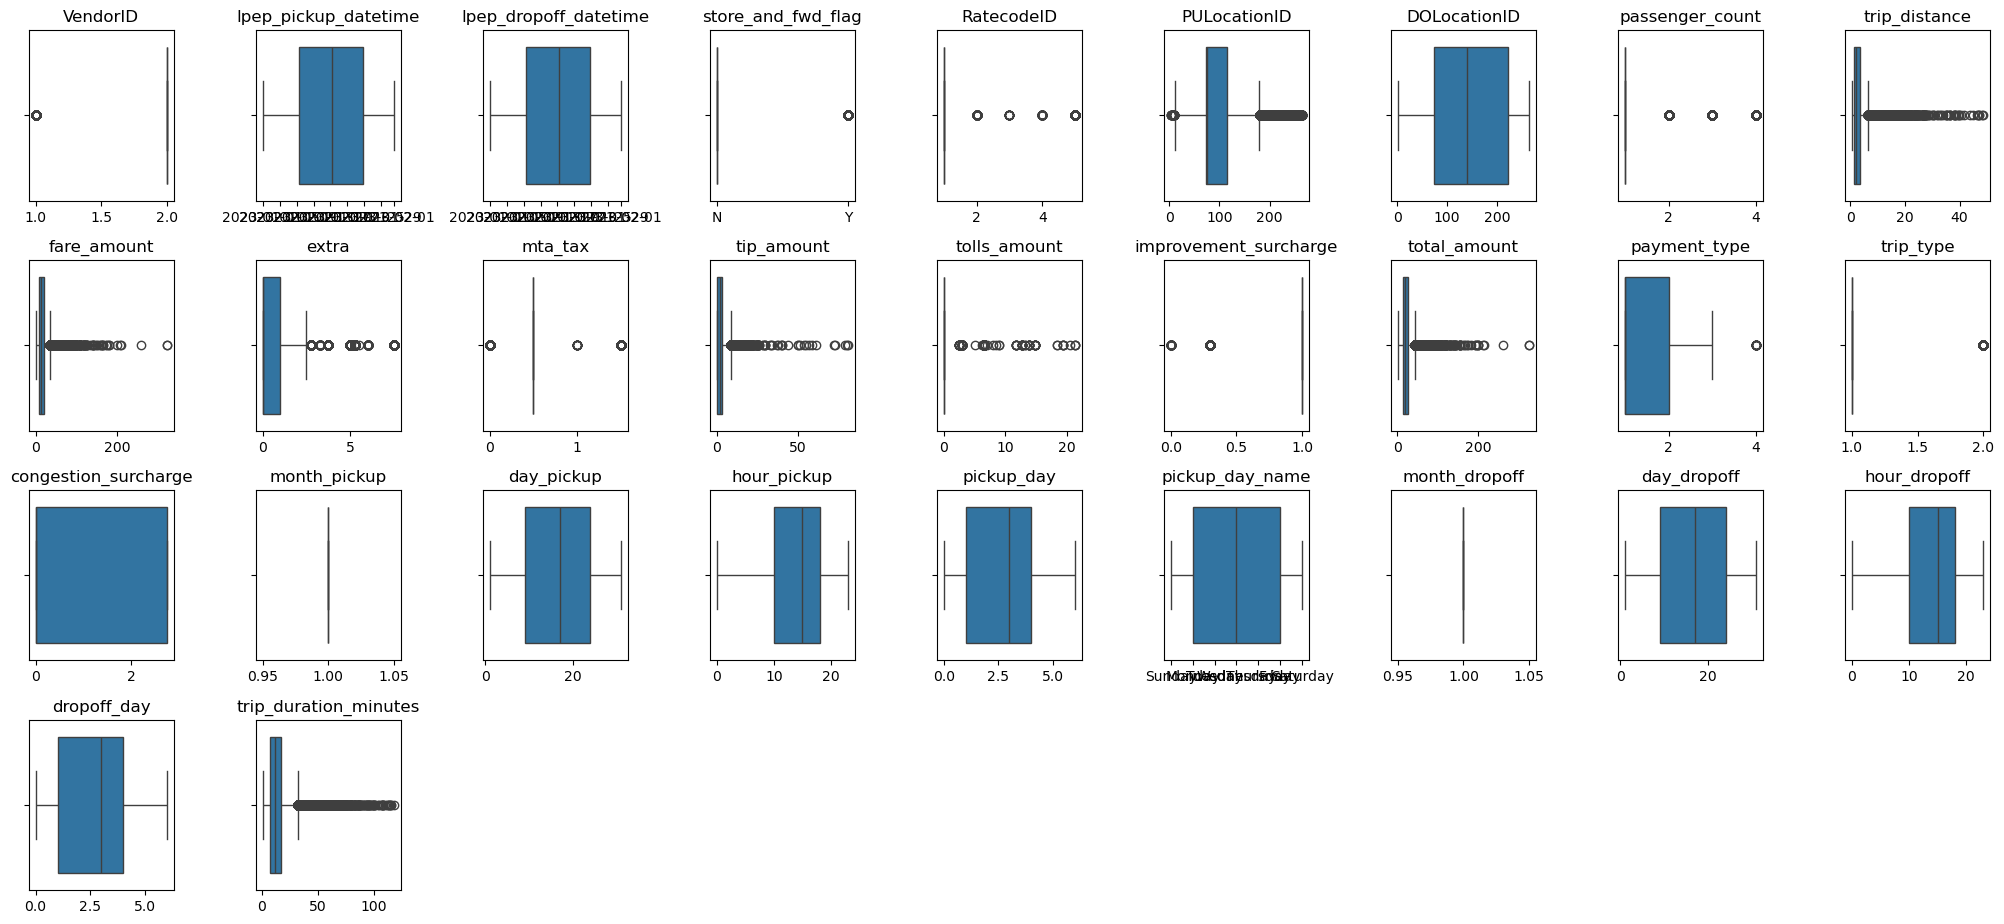

In [80]:
rows, cols = 7, 9
fig, axes = plt.subplots(rows, cols, figsize=(20, 16))
axes = axes.flatten()
for i, column in enumerate(data.columns):
    sns.boxplot(data=data, x=column, ax=axes[i])  # Use each subplot's axis
    axes[i].set_title(column)
    axes[i].set_xlabel('')  # Optional: Hide x-axis labels for a cleaner look

# Remove any empty subplots (if columns < grid slots)
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])

# Adjust layout and show plot
# plt.subplots_adjust(left=None, bottom=None, right=None, wspace=1.5, hspace=1.5)
plt.tight_layout()
plt.show()

In [81]:
data.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'month_pickup',
       'day_pickup', 'hour_pickup', 'pickup_day', 'pickup_day_name',
       'month_dropoff', 'day_dropoff', 'hour_dropoff', 'dropoff_day',
       'trip_duration_minutes'],
      dtype='object')

In [82]:
data.congestion_surcharge.value_counts()

congestion_surcharge
0.00    43517
2.75    15640
Name: count, dtype: int64

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59157 entries, 0 to 68209
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               59157 non-null  int64         
 1   lpep_pickup_datetime   59157 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  59157 non-null  datetime64[ns]
 3   store_and_fwd_flag     59157 non-null  object        
 4   RatecodeID             59157 non-null  float64       
 5   PULocationID           59157 non-null  int64         
 6   DOLocationID           59157 non-null  int64         
 7   passenger_count        59157 non-null  float64       
 8   trip_distance          59157 non-null  float64       
 9   fare_amount            59157 non-null  float64       
 10  extra                  59157 non-null  float64       
 11  mta_tax                59157 non-null  float64       
 12  tip_amount             59157 non-null  float64       
 13  tolls_

In [84]:
len(data)

59157

In [85]:
data.trip_distance.value_counts(sort=False)

trip_distance
2.58     101
1.81     160
1.30     548
1.10     450
2.78      86
        ... 
18.22      1
13.17      1
18.62      1
30.09      1
40.71      1
Name: count, Length: 1779, dtype: int64

AFTER WE MANIPULATE COLUMN AND DATA NOW TIME TO EDA

In [86]:
# Q1 = data['trip_distance'].quantile(0.25)
# Q3 = data['trip_distance'].quantile(0.75)
# IQR = Q3 - Q1
# # Define outliers as values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
# outliers = data[(data['trip_distance'] < (Q1 - 1.5 * IQR)) | (data['trip_distance'] > (Q3 + 1.5 * IQR))]

# # Print outliers
# print("Outliers:\n", outliers)
# len(outliers)

## Exploratory Data Analysis

### Question 1: which favorite Vendor for NYC Taxi

### Question 2: Which Day high traffic for Pickup

### Question 3: Most Use Payment method in NYC Taxi

### Question 4: Which Hour have peak income

### Question 5: Comparasion Income on Each Trip type

## Statistical Analysis

In [97]:
from scipy import stats #for stats

In [103]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(data['trip_distance'], data['fare_amount'])
print(f'Korelasi Pearson: {corr}, p-value: {p_value}')


Korelasi Pearson: 0.9130911322652354, p-value: 0.0


## Export Result

In [104]:
data.to_csv('NYC_clean.csv')